분석방향

강릉, 목포, 전주, (안동)지역 그룹핑 후 세부 지역 이용객 분석
월별, (역별),축제(기간별)


역별 고객특성 성별, 연령대 ,출발역

공휴일/축제기간별 기준으로 데이터를 정리하기


## 연도별, 월별 공휴일/주말 승객 수


(전주,강릉,목포)역별 고객특성 성별, 연령대 ,출발역


In [ ]:
import pandas as pd
역별승하차실적_2021= pd.read_csv("/content/drive/MyDrive/관광거점도시/역별 승하차실적_2021.csv")
역별승하차실적_2020= pd.read_csv("/content/drive/MyDrive/관광거점도시/역별 승하차실적_2020.csv")
역별승하차실적_2019= pd.read_csv("/content/drive/MyDrive/관광거점도시/역별 승하차실적_2019.csv")
역별승하차실적_2018= pd.read_csv("/content/drive/MyDrive/관광거점도시/역별 승하차실적_2018.csv")

고객2019= pd.read_csv("/content/drive/MyDrive/관광거점도시/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv")
고객2020= pd.read_csv("/content/drive/MyDrive/관광거점도시/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020.csv")
고객2021= pd.read_csv("/content/drive/MyDrive/관광거점도시/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021.csv")

역별주소= pd.read_excel("/content/drive/MyDrive/관광거점도시/역별 주소정보.xlsx")



In [ ]:
역별승하차18_21 = pd.concat([역별승하차실적_2021,역별승하차실적_2020,역별승하차실적_2019,역별승하차실적_2018],ignore_index=True)

고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019

데이터는 각 3월 ~5월만 존재

강릉 - 강릉역, 정동진역

전주 - 전주역

목포 - 목포역, 임성리 ?

표준 = 주말

In [ ]:
역별승하차18_21=역별승하차18_21[['운행일자','운행영업일단계','정차역','하차인원수']]

In [ ]:
역별승하차18_21['하차인원수'] = 역별승하차18_21['하차인원수'].replace(',', '.', regex=True).astype(float)

In [ ]:
역별승하차18_21=역별승하차18_21.groupby(by=['운행일자','운행영업일단계','정차역'], as_index=False).sum()

In [ ]:
condition = (역별승하차18_21.정차역 == '강릉') | (역별승하차18_21.정차역 == '목포') | (역별승하차18_21.정차역 == '정동진')| (역별승하차18_21.정차역 == '전주') | (역별승하차18_21.정차역 == '임성리')

In [ ]:
역별승하차18_21=역별승하차18_21.loc[condition, ['운행일자', '운행영업일단계', '정차역','하차인원수']]

In [ ]:
c_day = (역별승하차18_21.운행영업일단계 == '공휴일')|(역별승하차18_21.운행영업일단계 == '표준')

In [ ]:
역별승하차18_21=역별승하차18_21.loc[c_day, ['운행일자', '운행영업일단계', '정차역','하차인원수']]

In [ ]:
역별승하차18_21['하차인원수']=역별승하차18_21['하차인원수'].astype(int)

In [ ]:
역별승하차18_21['운행일자'] = 역별승하차18_21['운행일자'].astype(str)
역별승하차18_21['연도']=역별승하차18_21['운행일자'].str[:4]
역별승하차18_21.replace('임성리','목포',inplace=True)
역별승하차18_21.replace('정동진','강릉',inplace=True)

In [ ]:
역별승하차18_21=역별승하차18_21.groupby(by=['연도','운행영업일단계','정차역'], as_index=False).sum()

In [ ]:
hoilday = (역별승하차18_21.운행영업일단계	 == '공휴일') 

In [ ]:
공휴일D = 역별승하차18_21.loc[hoilday, ['연도', '정차역','하차인원수']]

In [ ]:
공휴일D=공휴일D[공휴일D.월!='2018년 2월']

AttributeError: ignored

In [ ]:
weekend = (역별승하차18_21.운행영업일단계	 == '표준') 

In [ ]:
주말D = 역별승하차18_21.loc[weekend, ['연도', '정차역','하차인원수']]

In [ ]:
주말D=주말D[주말D.월!='2018년 02월']

AttributeError: ignored

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,349 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## 역별 주말 / 공휴일 승객 수

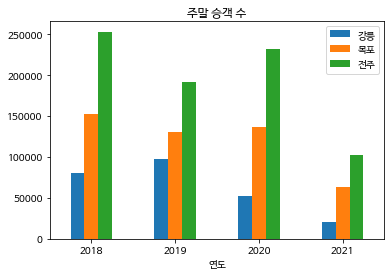

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

주말G = 주말D.groupby(['연도', '정차역'])

주말G['하차인원수'].sum().unstack().fillna(0).plot.bar()
plt.xticks(rotation=0) 
plt.legend(loc='upper right',fontsize=10)
plt.title("주말 승객 수")
plt.show()

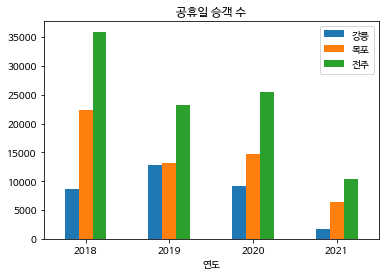

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

공휴일G = 공휴일D.groupby(['연도', '정차역'])

공휴일G['하차인원수'].sum().unstack().fillna(0).plot.bar()
plt.xticks(rotation=0) 
plt.legend(loc='upper right',fontsize=10)
plt.title("공휴일 승객 수")
plt.show()

### **(전주,강릉,목포)역별 고객특성 성별, 연령대 ,출발역**

In [ ]:
고객 = pd.concat([고객2019,고객2020,고객2021],ignore_index=True)

In [ ]:
고객.replace('임성리','목포',inplace=True)
고객.replace('정동진','강릉',inplace=True)

In [ ]:
고객['인원'] = 고객['인원'].replace(',', '.', regex=True).astype(int)

In [ ]:
condition_cus = (고객.구분 == '회원') 

In [ ]:
고객=고객.loc[condition_cus, ['운행일자', '운행요일', '출발시간대','성별','연령대','출발역명','도착역명','인원']]

In [ ]:
condition_cus2=(고객.도착역명 == '목포')|(고객.도착역명 == '전주')|(고객.도착역명 == '강릉')

In [ ]:
고객=고객.loc[condition_cus2, ['성별','연령대','출발역명','도착역명','인원']]

In [ ]:
고객

,성별,연령대,출발역명,도착역명,인원
682,F,20~29세,강릉,강릉,2
684,M,50~59세,강릉,강릉,2
743,F,20~29세,강릉,강릉,3
756,F,30~39세,강릉,강릉,1
793,M,20~29세,강릉,강릉,2
...,...,...,...,...,...
1632175,M,20~29세,서대전,전주,1
1632176,M,20~29세,남원,전주,1
1632177,M,30~39세,서대전,전주,2
1632178,M,40~49세,순천,전주,1


In [ ]:
gender_data=고객.groupby(by=['도착역명','성별'], as_index=False).sum()

In [ ]:
gender_data

,도착역명,성별,인원
0,강릉,*,959
1,강릉,F,376972
2,강릉,M,295244
3,목포,*,570
4,목포,F,158596
5,목포,M,179678
6,전주,*,449
7,전주,F,341573
8,전주,M,311046


In [ ]:
gender_data = gender_data[gender_data.성별 != '*']


In [ ]:
gender_data = gender_data.reset_index()
gender_pivot = gender_data.pivot(index='도착역명',columns='성별',values='인원')
gender_pivot


성별,F,M
도착역명,,
강릉,376972,295244
목포,158596,179678
전주,341573,311046


## **강릉, 전주, 목포 승객의 성별**

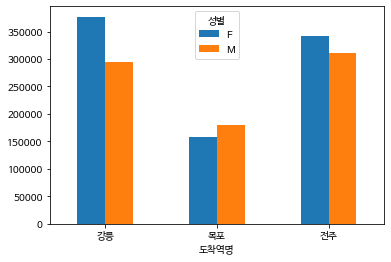

In [ ]:
gender_pivot.plot.bar(rot=0)

### 고객 특성(연령대)

In [ ]:
age_data=고객.groupby(by=['도착역명','연령대'], as_index=False).sum()

In [ ]:
age_data

,도착역명,연령대,인원
0,강릉,0~19세,17998
1,강릉,20~29세,236985
2,강릉,30~39세,155248
3,강릉,40~49세,124257
4,강릉,50~59세,89356
5,강릉,60~64세,25376
6,강릉,65세이상,23892
7,강릉,기타,63
8,목포,0~19세,8646
9,목포,20~29세,89641


In [ ]:
age_data = age_data[age_data.연령대 != '기타']

In [ ]:
age_data = age_data.reset_index()
age_data_pivot = age_data.pivot(index='연령대',columns='도착역명',values='인원')


## **강릉, 전주, 목포 승객의 연령대**

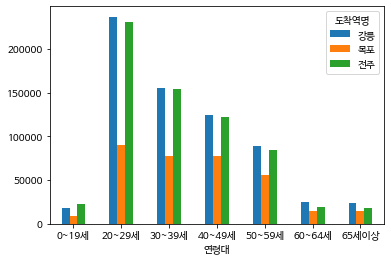

In [ ]:
age_data_pivot.plot.bar(rot=0)

### 출발역

In [ ]:
leave_data=고객.groupby(by=['도착역명','출발역명'], as_index=False).sum()

In [ ]:
leave_data

,도착역명,출발역명,인원
0,강릉,강릉,16133
1,강릉,경산,8
2,강릉,경주,55
3,강릉,고한,248
4,강릉,구미,30
...,...,...,...
159,전주,천안,3883
160,전주,천안아산,20479
161,전주,평택,6350
162,전주,함열,929


In [ ]:
gangneung = (leave_data.도착역명	 == '강릉') 
강릉_arrived = leave_data.loc[gangneung, ['도착역명','출발역명','인원']]

In [ ]:
mokpo = (leave_data.도착역명	 == '목포') 
목포_arrived = leave_data.loc[mokpo, ['도착역명','출발역명','인원']]

In [ ]:
jeonju = (leave_data.도착역명	 == '전주') 
전주_arrived = leave_data.loc[jeonju, ['도착역명','출발역명','인원']]

In [ ]:
강릉_arrived=강릉_arrived.sort_values('인원',ascending=False)

In [ ]:
목포_arrived=목포_arrived.sort_values('인원',ascending=False)

In [ ]:
전주_arrived=전주_arrived.sort_values('인원',ascending=False)

In [ ]:
강릉_arrived

,도착역명,출발역명,인원
33,강릉,서울,300720
56,강릉,청량리,238517
31,강릉,상봉,48906
18,강릉,만종,27652
0,강릉,강릉,16133
...,...,...,...
8,강릉,기장,2
23,강릉,반곡,2
53,강릉,지평,1
64,강릉,화본,1


In [ ]:
전주_arrived

,도착역명,출발역명,인원
154,전주,용산,243089
155,전주,익산,76487
135,전주,광명,57827
145,전주,순천,40053
142,전주,서울,29951
144,전주,수원,26038
148,전주,여수엑스포,21658
141,전주,서대전,21572
160,전주,천안아산,20479
152,전주,오송,20260


In [ ]:
목포_arrived

,도착역명,출발역명,인원
106,목포,용산,130753
69,목포,광명,46333
72,목포,광주송정,36832
96,목포,서울,28597
108,목포,익산,19465
...,...,...,...
83,목포,목포,3
81,목포,득량,3
129,목포,횡천,2
79,목포,능주,1


## **강릉,전주,목포 승객의 출발지**

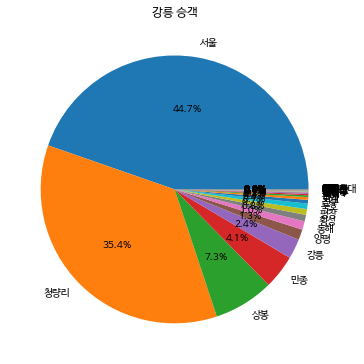

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(6,10)) ## 캔버스 생성
fig.set_facecolor('white')
ax = fig.add_subplot() ## 프래임 생성
 
ax.pie(강릉_arrived['인원'], labels=강릉_arrived['출발역명'], autopct='%.1f%%')
plt.title("강릉 승객")

plt.show()


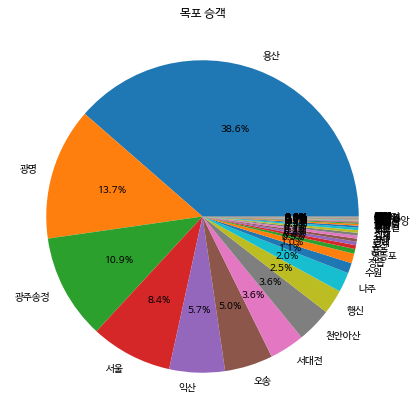

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(7,11)) ## 캔버스 생성
fig.set_facecolor('white')
ax = fig.add_subplot() ## 프래임 생성
 
ax.pie(목포_arrived['인원'], labels=목포_arrived['출발역명'], autopct='%.1f%%')
plt.title("목포 승객")
plt.show()

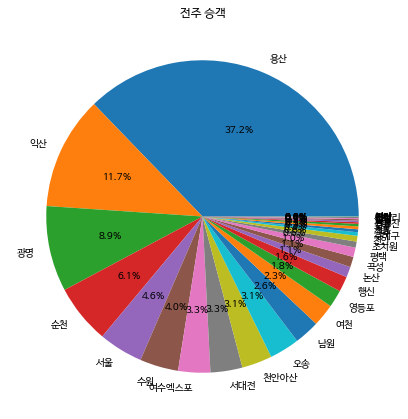

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(7,11)) ## 캔버스 생성
fig.set_facecolor('white')
ax = fig.add_subplot() ## 프래임 생성
 
ax.pie(전주_arrived['인원'], labels=전주_arrived['출발역명'], autopct='%.1f%%')
plt.title("전주 승객")

plt.show()